In [12]:
import pandas as pd

data_directory = '../data/'

df = pd.read_csv(data_directory + 'fraud_train.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,619,CASH_IN,386385.08,C421351828,4669568.85,5055953.92,C1977099364,506035.06,119649.98,0,0
1,164,CASH_IN,212458.78,C83569848,234635.00,447093.78,C1690589535,806037.88,593579.10,0,0
2,382,PAYMENT,19967.60,C852995095,3634.00,0.00,M1695416333,0.00,0.00,0,0
3,180,CASH_OUT,527616.51,C61761046,180216.00,0.00,C577654587,92157.10,619773.61,0,0
4,36,TRANSFER,206067.85,C758004147,0.00,0.00,C2143015292,2131494.48,2337562.32,0,0


### Check for missing values:

In [13]:
import numpy as np
# check for missing values

np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

no missing values in the data, so no row removal or column estimation required right now

### Encode Categorical variables

type, name of origin and destination features are categorical. Need to encode them with numerical values to make them comprehensible to the algorithms i will be coding.

Methods:
1) Ordinal coding - for known relationship between categories - not our case
2) One hot encoding - no relationship between categories - reflects our case
3) Learned embedding - combines both

Since there is no ordered relationship between the categories, using one hot encoding makes.

Downside: too many columns are generated

In [14]:
print(df['type'].nunique())
print(df['type'].unique())

print(df['nameOrig'].nunique())

print(df['nameDest'].nunique())

# number of rows in the frame
print(df.shape[0])

5
['CASH_IN' 'PAYMENT' 'CASH_OUT' 'TRANSFER' 'DEBIT']
5084151
2265727
5090096


it seems feasible to use one hot encoding for type of transaction, but not for name and destination categories

What about the number of categories per class and how many categorical variables do each have?

In [15]:
# rows with isfraud = 1
print(df[df['isFraud'] == 1].shape[0])

print(df[df['isFraud'] == 0].shape[0])

print(df[df['isFlaggedFraud'] == 1].shape[0])

print(df[df['isFlaggedFraud'] == 0].shape[0])

# print unique type for isfraud == 1 (total = 5)
print(df[df['isFraud'] == 1]['type'].unique())

print(df[df['isFlaggedFraud'] == 1]['type'].unique())

print(df[df['isFraud'] == 1]['nameDest'].nunique())

6593
5083503
13
5090083
['TRANSFER' 'CASH_OUT']
['TRANSFER']
6566


Ammount of transaction in fraud transactions

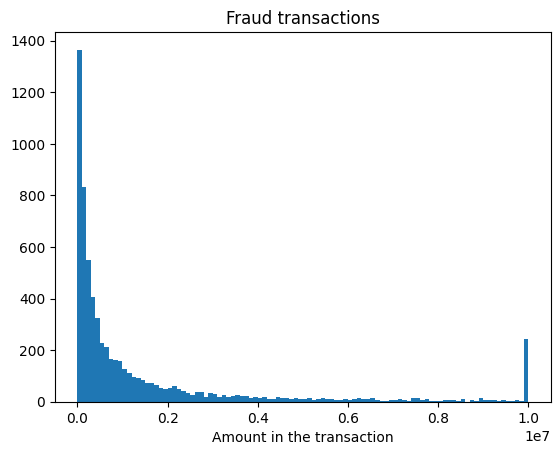

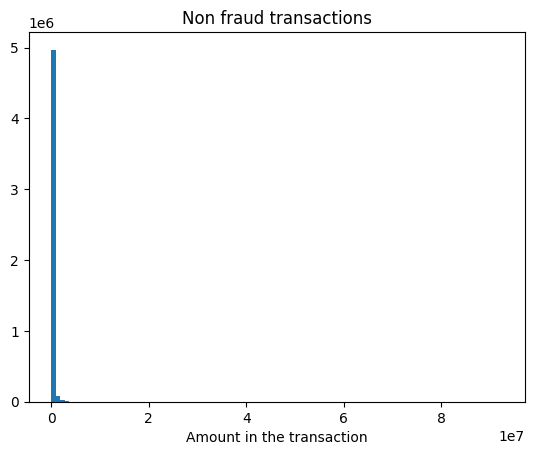

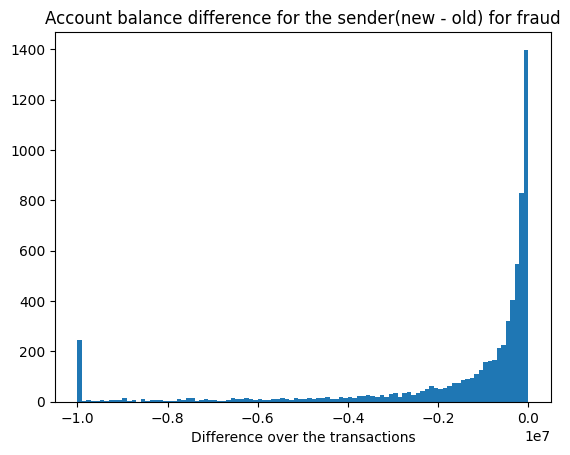

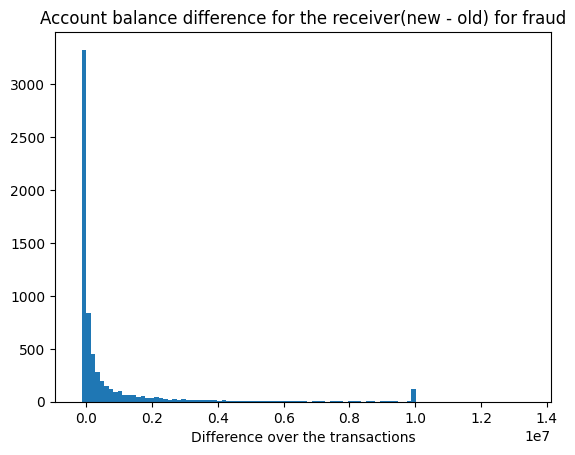

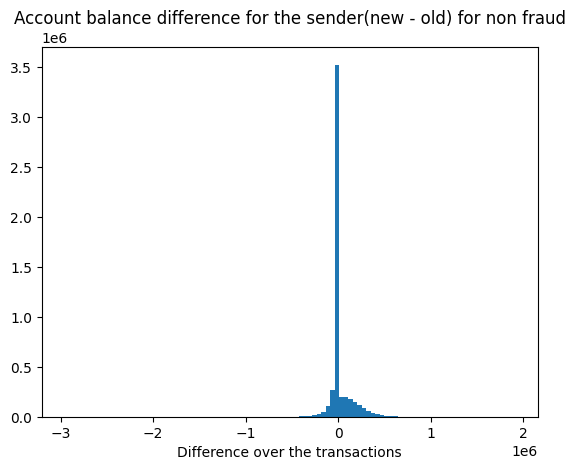

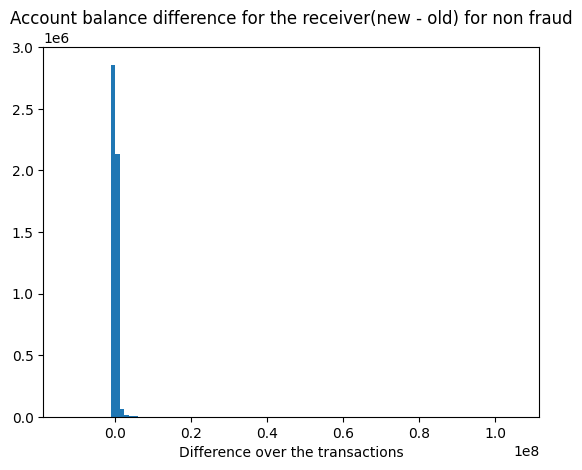

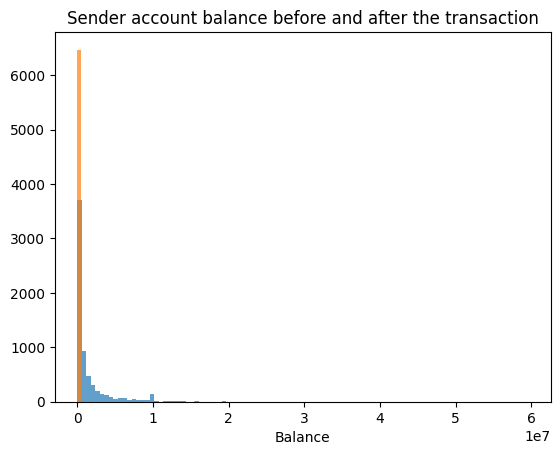

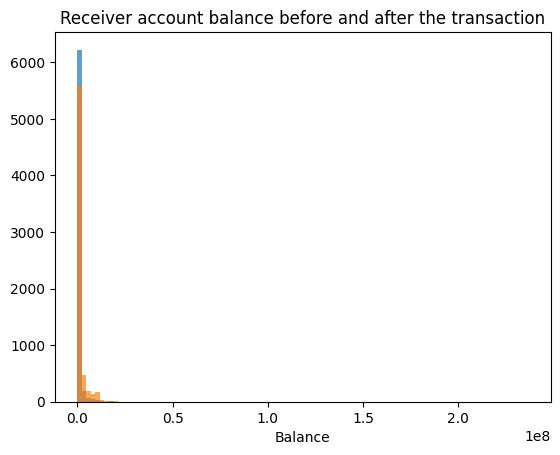

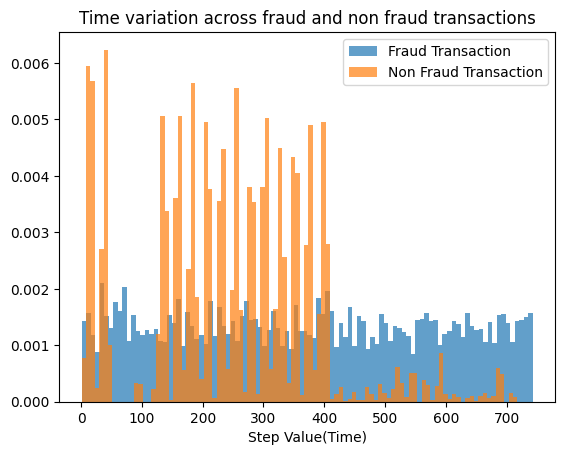

In [16]:
# plot for amount index for isFraud == 1

import matplotlib.pyplot as plt

plt.hist(df[df['isFraud'] == 1]['amount'],bins=100)
plt.xlabel('Amount in the transaction')
plt.title('Fraud transactions')
plt.show()

plt.hist(df[df['isFraud'] == 0]['amount'],bins=100)
plt.xlabel('Amount in the transaction')
plt.title('Non fraud transactions')
plt.show()

plt.hist(df[df['isFraud'] == 1]['newbalanceOrig'] - df[df['isFraud'] == 1]['oldbalanceOrg'],bins=100)
plt.xlabel('Difference over the transactions')
plt.title('Account balance difference for the sender(new - old) for fraud')
plt.show()

plt.hist(df[df['isFraud'] == 1]['newbalanceDest'] - df[df['isFraud'] == 1]['oldbalanceDest'],bins=100)
plt.xlabel('Difference over the transactions')
plt.title('Account balance difference for the receiver(new - old) for fraud')
plt.show()

plt.hist(df[df['isFraud'] == 0]['newbalanceOrig'] - df[df['isFraud'] == 0]['oldbalanceOrg'],bins=100)
plt.xlabel('Difference over the transactions')
plt.title('Account balance difference for the sender(new - old) for non fraud')
plt.show()

plt.hist(df[df['isFraud'] == 0]['newbalanceDest'] - df[df['isFraud'] == 0]['oldbalanceDest'],bins=100)
plt.xlabel('Difference over the transactions')
plt.title('Account balance difference for the receiver(new - old) for non fraud')
plt.show()

plt.hist(df[df['isFraud'] == 1]['oldbalanceOrg'],bins=100,label='Old balance',alpha=0.7)
plt.hist(df[df['isFraud'] == 1]['newbalanceOrig'],bins=100,label='New balance',alpha=0.7)
plt.xlabel('Balance')
plt.title('Sender account balance before and after the transaction')
plt.show()

plt.hist(df[df['isFraud'] == 1]['oldbalanceDest'],bins=100,label='Old balance',alpha=0.7)
plt.hist(df[df['isFraud'] == 1]['newbalanceDest'],bins=100,label='New balance',alpha=0.7)
plt.xlabel('Balance')
plt.title('Receiver account balance before and after the transaction')
plt.show()

plt.hist(df[df['isFraud'] == 1]['step'],bins=100,label='Fraud Transaction',alpha=0.7, density=True)
plt.hist(df[df['isFraud'] == 0]['step'],bins=100,label='Non Fraud Transaction',alpha=0.7, density=True)
plt.xlabel('Step Value(Time)')
plt.title('Time variation across fraud and non fraud transactions')
plt.legend()
plt.show()


One hot encoding for 'type' categories

In [ ]:
# first implementing DT with categorical type values



Do PCA and understand feature correlation

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_53928/980797388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['diffOrig'] = numeric_df['newbalanceOrig'] - numeric_df['oldbalanceOrg']
/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_53928/980797388.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['diffDest'] = numeric_df['newbalanceDest'] - numeric_df['oldbalanceDest']


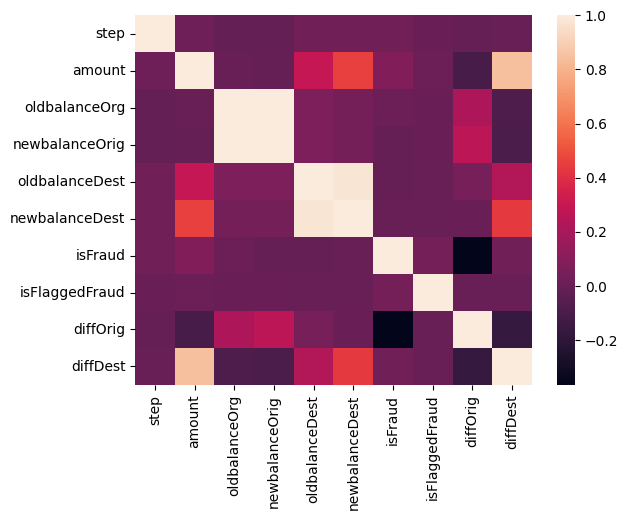

In [10]:
# Plot correlation matrix:
import seaborn as sns

numeric_df = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
# add account balance difference

numeric_df['diffOrig'] = numeric_df['newbalanceOrig'] - numeric_df['oldbalanceOrg']
numeric_df['diffDest'] = numeric_df['newbalanceDest'] - numeric_df['oldbalanceDest']

corr = numeric_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

DT implementation

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Node:
    def __init__(self,datapoints):
        self.datapoints = datapoints
        self.feature_index = None
        self.threshold = None
        self.right = None
        self.left = None
        self.is_leafnode = False
        self.depth = 0

class DecisionTree:
    def __init__(self,max_depth,min_size,datapoints):
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = Node(datapoints)

    def get_entropy(self,node):
        X = node.datapoints
        # for binary classification
        class_0 = X[X.iloc[:,-1] == 0]
        class_1 = X[X.iloc[:,-1] == 1]
        print("class_0:",len(class_0))
        print("class_1:",len(class_1))
        if len(class_0) == 0 or len(class_1) == 0:
            return 0
        p_0 = len(class_0)/(len(class_0) + len(class_1))
        p_1 = len(class_1)/(len(class_1) + len(class_0))
        p_classes = [p_0,p_1]
        entropy = -1*sum([p_class*np.log(p_class) for p_class in p_classes])
        return entropy
    
    def find_best_split(self,node):
        X = node.datapoints
        entropy_parent = self.get_entropy(node)
        
        information_gain = 0
        for row in range(X.shape[0]):
            for column in range(X.shape[1]-1):
                feature_index = column
                feature_val = X.iloc[row][column]
                print("feature:",X.columns[feature_index])
                print("feature_val:",feature_val)
                # split the data based on the feature value
                left_split = X[X.iloc[:,feature_index] <= feature_val]
                right_split = X[X.iloc[:, feature_index] > feature_val]
                if left_split.shape[0] == 0:
                    cur_left_child = None
                    left_child_entropy = 0
                else:
                    cur_left_child = Node(left_split)
                    left_child_entropy = self.get_entropy(cur_left_child)
                if right_split.shape[0] == 0:
                    cur_right_child = None
                    right_child_entropy = 0
                else:
                    cur_right_child = Node(right_split)
                    right_child_entropy = self.get_entropy(cur_right_child)
                cur_information_gain = entropy_parent - (left_split.shape[0]*left_child_entropy + right_split.shape[0]*right_child_entropy)/X.shape[0]
                if cur_information_gain > information_gain:
                    information_gain = cur_information_gain
                    best_feature_index = feature_index
                    best_feature_val = feature_val
        return best_feature_index, best_feature_val, information_gain
    
    # def build_tree(self,dataset,depth):
    #     node = Node(dataset)
    #     node.depth = depth
    #     if dataset.shape[0] < self.min_size:
    #         node.is_leafnode = True
    #         return node
    #     if node.depth >= self.max_depth:
    #         node.is_leafnode = True
    #         return node
    #     # check if the classes in the passed dataset are pure
    #     if len(set(dataset.iloc[:,-1])) == 1 or len(set(dataset.iloc[:,-1])) == 0 or len(dataset) < self.min_size:
    #         node.is_leafnode = True
    #         return node
        
    #     best_feature_index, best_feature_val, information_gain = self.find_best_split(node)
    #     left_split, right_split = self.split_data(node, best_feature_index, best_feature_val)
    #     node.left = self.build_tree(left_split,depth+1)
    #     node.right = self.build_tree(right_split,depth+1)
        return node
    
    def build_tree(self, node, depth):
        datapoints = node.datapoints
        if (datapoints.shape[0] < self.min_size or depth >= self.max_depth or len(set(datapoints.iloc[:,-1])) <= 1):
            node.is_leafnode = True
            return node
        best_feature_index, best_feature_val, information_gain = self.find_best_split(node)
        if information_gain == 0:
            node.is_leafnode = True
            return node 
        left_split, right_split = self.split_data(node, best_feature_index, best_feature_val)
        
        # if either one of the splits are empty then the split is not createing a division in the data
        if len(left_split) == 0 or len(right_split) == 0:
            node.is_leafnode = True
            return node
        
        node.feature_index = best_feature_index
        node.threshold = best_feature_val
        node.left = self.build_tree(left_split, depth+1)
        node.right = self.build_tree(right_split, depth+1)
        return node
    
    def fit(self,X):
        self.root = self.build_tree(self.root,0)

    def split_data(node, feature_index, threshold):
        X = node.datapoints
        left_split = X[X.iloc[:,feature_index] <= threshold]
        right_split = X[X.iloc[:, feature_index] > threshold]
        return left_split,right_split

    def pred_node(self,node):
        # bayer moore voting(common algorithm for getting majority element in a list in O(n))
        count = 0
        for datapoint in node.datapoints:
            if datapoint[-1] == 1:
                count += 1
            else:
                count -= 1
        if count > 0:
            return 1
        else:
            return 0
        
    def predict(self,X):
        for datapoint in X:
            node_cur = self.root
            while not node_cur.is_leafnode:
                if datapoint[node_cur.feature_index] <= node_cur.threshold:
                    node_cur = node_cur.left
                else:
                    node_cur = node_cur.right
            return self.pred_node(node_cur)

data_directory = '../data/'
df = pd.read_csv(data_directory + 'fraud_train.csv')

X = df[['step','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
X['diffOrig'] = X['newbalanceOrig'] - X['oldbalanceOrg']
X['diffDest'] = X['newbalanceDest'] - X['oldbalanceDest']
X['isFraud'] = df['isFraud']
print(X.columns)

print(X.head())

dt = DecisionTree(20,1,X.head(1000))

dt.fit(X.head(1000))

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_16522/466462365.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['diffOrig'] = X['newbalanceOrig'] - X['oldbalanceOrg']
/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_16522/466462365.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['diffDest'] = X['newbalanceDest'] - X['oldbalanceDest']
/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_16522/466462365.py:149: SettingWithCopyWarning: 
A value is trying to be set on 

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'diffOrig', 'diffDest', 'isFraud'],
      dtype='object')
   step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0   619  386385.08     4669568.85      5055953.92       506035.06   
1   164  212458.78      234635.00       447093.78       806037.88   
2   382   19967.60        3634.00            0.00            0.00   
3   180  527616.51      180216.00            0.00        92157.10   
4    36  206067.85           0.00            0.00      2131494.48   

   newbalanceDest   diffOrig   diffDest  isFraud  
0       119649.98  386385.07 -386385.08        0  
1       593579.10  212458.78 -212458.78        0  
2            0.00   -3634.00       0.00        0  
3       619773.61 -180216.00  527616.51        0  
4      2337562.32       0.00  206067.84        0  
class_0: 996
class_1: 4
feature: step
feature_val: 619.0
class_0: 989
class_1: 4
class_0: 7
class_1: 0
feature: amount

TypeError: DecisionTree.split_data() takes 3 positional arguments but 4 were given

In [18]:
print(dt.root.feature_index)

None


In [72]:
import numpy as np
import pandas as pd

class Node:
    def __init__(self, datapoints):
        self.datapoints = datapoints
        self.feature_index = None
        self.threshold = None
        self.right = None
        self.left = None
        self.is_leafnode = False
        self.depth = 0

class DecisionTree:
    def __init__(self, max_depth, min_size, datapoints):
        self.max_depth = max_depth
        self.min_size = min_size
        self.root = Node(datapoints)

    def get_entropy(self, node):
        X = node.datapoints
        # for binary classification
        class_0 = X[X.iloc[:,-1] == 0]
        class_1 = X[X.iloc[:,-1] == 1]
        if len(class_0) == 0 or len(class_1) == 0:
            return 0
        p_0 = len(class_0) / len(X)
        p_1 = len(class_1) / len(X)
        entropy = -1 * (p_0 * np.log2(p_0) + p_1 * np.log2(p_1))
        return entropy
    
    def split_data(self, node, feature_index, threshold):
        X = node.datapoints
        left_split = X[X.iloc[:, feature_index] <= threshold]
        right_split = X[X.iloc[:, feature_index] > threshold]
        return left_split, right_split
    
    def find_best_split(self, node):
        X = node.datapoints
        entropy_parent = self.get_entropy(node)
        
        best_information_gain = -float('inf')
        best_feature_index = None
        best_feature_val = None

        for feature_index in range(X.shape[1] - 1):
            feature_values = X.iloc[:, feature_index].unique()
            for feature_val in feature_values:
                left_split, right_split = self.split_data(node, feature_index, feature_val)
                
                if len(left_split) == 0 or len(right_split) == 0:
                    continue
                
                left_entropy = self.get_entropy(Node(left_split))
                right_entropy = self.get_entropy(Node(right_split))
                
                # get the information gain
                information_gain = entropy_parent - (len(left_split) / len(X) * left_entropy + len(right_split) / len(X) * right_entropy)
                
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_feature_index = feature_index
                    best_feature_val = feature_val

        return best_feature_index, best_feature_val, best_information_gain

    def build_tree(self, node, depth):
        print(f"current node at depth: {depth}, datapoints left: {len(node.datapoints)}, unique classes: {set(node.datapoints.iloc[:,-1])}")
        if len(node.datapoints) < self.min_size:
            node.is_leafnode = True
            print(f"leaf node created at depth {depth} because of the min points conditions")
            print("entropy:",self.get_entropy(node))
            return node
        
        if depth >= self.max_depth:
            node.is_leafnode = True
            print(f"leaf node created at depth {depth} because of the max depth condition")
            print("entropy:",self.get_entropy(node))
            return node
        
        # impurity of the current node is 0
        if self.get_entropy(node) == 0:
            node.is_leafnode = True
            print(f"leaf node created at depth {depth} as the node has 0 impurity")
            return node
        
        best_feature_index, best_feature_val, information_gain = self.find_best_split(node)
        
        if information_gain <= 0:
            node.is_leafnode = True
            print(f"leaf node created at depth {depth} as there is no information gain")
            return node
        
        left_split, right_split = self.split_data(node, best_feature_index, best_feature_val)
        
        if len(left_split) == 0 or len(right_split) == 0:
            node.is_leafnode = True
            print(f"leaf node created at depth {depth} as the split does not create two children")
            return node
        
        node.feature_index = best_feature_index
        node.threshold = best_feature_val
        print(f"node created at depth {depth} with feature={features[best_feature_index]}, threshold={best_feature_val} and entropy={self.get_entropy(node)}")
        
        node.left = self.build_tree(Node(left_split), depth + 1)
        node.right = self.build_tree(Node(right_split), depth + 1)
        return node
    
    def fit(self, X):
        print("fitting the decision tree...")
        self.root = self.build_tree(self.root, 0)
        print("fitting complete")

    def pred_node(self, node):
        pred_dict = {1: 0, 0: 0}
        for index, datapoint in node.datapoints.iterrows():
            pred_dict[datapoint.iloc[-1]] += 1
        return max(pred_dict, key=pred_dict.get)

    def predict(self,X):
        num_datapoints = X.shape[0]
        predictions = []
        for i in range(num_datapoints):
            datapoint = X.iloc[i]
            node_cur = self.root
            while not node_cur.is_leafnode:
                if datapoint[node_cur.feature_index] <= node_cur.threshold:
                    node_cur = node_cur.left
                else:
                    node_cur = node_cur.right
            predictions.append(self.pred_node(node_cur))
        return predictions

# Data preparation
data_directory = '../data/'
df = pd.read_csv(data_directory + 'fraud_train.csv')
X = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].copy()
X['diffOrig'] = X['newbalanceOrig'] - X['oldbalanceOrg']
X['diffDest'] = X['newbalanceDest'] - X['oldbalanceDest']
features = X.columns
X['isFraud'] = df['isFraud']

dt = DecisionTree(max_depth=20, min_size=1, datapoints=X.head(3000))
dt.fit(X.head(3000))

fitting the decision tree...
current node at depth: 0, datapoints left: 3000, unique classes: {0, 1}
node created at depth 0 with feature=diffOrig, threshold=-316877.85 and entropy=0.023763605715170083
current node at depth: 1, datapoints left: 12, unique classes: {0, 1}
node created at depth 1 with feature=newbalanceDest, threshold=0.0 and entropy=0.9182958340544896
current node at depth: 2, datapoints left: 3, unique classes: {1}
leaf node created at depth 2 as the node has 0 impurity
current node at depth: 2, datapoints left: 9, unique classes: {0, 1}
node created at depth 2 with feature=diffOrig, threshold=-513082.74 and entropy=0.5032583347756457
current node at depth: 3, datapoints left: 2, unique classes: {0, 1}
node created at depth 3 with feature=step, threshold=275 and entropy=1.0
current node at depth: 4, datapoints left: 1, unique classes: {1}
leaf node created at depth 4 as the node has 0 impurity
current node at depth: 4, datapoints left: 1, unique classes: {0}
leaf node 

In [74]:
predictions = dt.predict(X.head(3000))

In [81]:
print(X.head(3000).iloc[:,-1].unique())
print(set(predictions))

[0 1]
{0, 1}


In [86]:
print(predictions.count(1))
print(predictions.count(0))
print(X.head(3000).iloc[:,-1].value_counts())

matches = [True for i in range(len(predictions)) if predictions[i] == X.head(3000).iloc[i,-1]]

7
2993
isFraud
0    2993
1       7
Name: count, dtype: int64


In [87]:
print(matches.count(True))

3000


In [39]:
# Gini index:
# formula: I(node) = 1 - sum({proportion of each class within a child node}^2)
# proportion = values within a class/by total values in a child node
# I(children) = sum((training points within a child node/total training)*I(child))

# calculate the gini index for a split (I(children))
def impurity_children(split_nodes):
    # split_nodes - list of lists, each list contains training points as integers corresponding to one of the classes
    # total training points in the split
    N = sum([len(node) for node in split_nodes])
    impurity = 0
    # calculating impurity using gini index
    for node in split_nodes:
        # if no training points in a node, then ignore it
        if len(node) == 0:
            continue
        # get types of classes in a node
        classes = set([i[-1] for i in node])
        print(classes)
        proportion_sum = 0
        # get the impurity value of a node
        for i in classes:
            class_values = [x[-1] for x in node]
            p_class = class_values.count(i)/len(node)
            print("class proportion: ",p_class)
            proportion_sum += p_class**2
        impurity_node = 1 - proportion_sum
        print("node impurity: ",impurity_node)

        # add to the children impurity accumulator
        impurity += (len(node[:-1])/N)*impurity_node
    return impurity

#[list of children[single child node[feature values ending with the class value]]]
# print(impurty_children([[[5,6,0],[5,6,0],[5,6,0]], [[5,6,1], [5,6,1], [5,6,1], [5,6,0], [5,6,0], [5,6,0], [5,6,0]]]))
print(impurity_children([[[5,6,0],[5,6,0],[5,6,1]],[[5,6,1],[5,6,1],[5,6,0]]]))
print(impurity_children([[[5,6,0],[5,6,0],[5,6,0]], [[5,6,1], [5,6,1], [5,6,1], [5,6,0], [5,6,0], [5,6,0], [5,6,0]]]))

{0, 1}
class proportion:  0.6666666666666666
class proportion:  0.3333333333333333
node impurity:  0.4444444444444444
{0, 1}
class proportion:  0.3333333333333333
class proportion:  0.6666666666666666
node impurity:  0.4444444444444444
0.2962962962962963
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.5714285714285714
class proportion:  0.42857142857142855
node impurity:  0.48979591836734704
0.2938775510204082


In [111]:
# split the data at a level using value ranges defined for a feature
def make_split(feature_index, feature_splitval, datapoints):
    left_child = []
    right_child = []
     
    for datapoint in datapoints:
        if datapoint[feature_index] <= feature_splitval:
            left_child.append(datapoint)
        else:
            right_child.append(datapoint)

    return left_child,right_child

In [112]:
# TODO: change the implementation for this more

def get_best_split(datapoints):
    
    min_gini, best_feature, best_splitval, best_children = float('inf'), None, None, None
    num_features = len(datapoints[0]) - 1 # last column is the class column
    
    for feature_index in range(num_features):
        for datapoint in datapoints:
            child_nodes = make_split(feature_index,datapoint[feature_index],datapoints)
            impurity_split = impurity_children(child_nodes)
            # not using entropy in my implementation, so im not using information gain here
            if impurity_split < min_gini:
                min_gini = impurity_split
                best_feature = feature_index
                best_splitval = datapoint[feature_index]
                best_children = child_nodes
    # nodes stored as [features_index, corresponding split value, child nodes(lists)]
    return [best_feature, best_splitval, best_children]

In [138]:
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]

split = get_best_split(dataset)

{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.375
class proportion:  0.625
node impurity:  0.46875
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.4444444444444444
class proportion:  0.5555555555555556
node impurity:  0.49382716049382713
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.16666666666666666
class proportion:  0.8333333333333334
node impurity:  0.2777777777777777
{0}
class proportion:  1.0
node impurity:  0.0
{1}
class proportion:  1.0
node impurity:  0.0
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.2857142857142857
class proportion:  0.7142857142857143
node impurity:  0.40816326530612246
{0, 1}
class proportion:  0.625
class proportion:  0.375
node impurity:  0.46875
{1}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.5555555555555556
class proportion:  0.4444444444444444
node impurity:  0.49382716049382713
{1}
class proportion:  1.0
node i

In [139]:
print(split)

[0, 3.961043357, ([[2.771244718, 1.784783929, 0], [1.728571309, 1.169761413, 0], [3.678319846, 2.81281357, 0], [3.961043357, 2.61995032, 0], [2.999208922, 2.209014212, 0]], [[7.497545867, 3.162953546, 1], [9.00220326, 3.339047188, 1], [7.444542326, 0.476683375, 1], [10.12493903, 3.234550982, 1], [6.642287351, 3.319983761, 1]])]


In [140]:
# get prediction based on maximum class values
def leaf_pred(leaf_node):
    place_classes = {}
    for i in leaf_node:
        if i[-1] not in place_classes:
            place_classes[i[-1]] = 1
        else:
            place_classes[i[-1]] += 1
    return max(place_classes, key=place_classes.get)

In [165]:
# build decision tree by recursively splititng and find the best splits
# create children for the node or convert it to a terminal
def process_node(node,curdepth,maxdepth,min_elems):
    leftchild, rightchild = node[2]
    # delete node[2] elements to save memory, node is an array
    node[2] = []
    
    # check if either left or right child is empty
    if not leftchild or not rightchild:
        # create a single terminal node
        tot_children = leftchild + rightchild
        node[-1].append(leaf_pred(tot_children))
        return
    # max depth has been reached
    if curdepth >= maxdepth:
        child_nodes = []
        child_nodes.append(leaf_pred(leftchild))
        child_nodes.append(leaf_pred(rightchild))
        node[-1].append(child_nodes)
        return
    # check if the number of elements in the left child is lesser than min_elems
    if len(leftchild) <= min_elems:
        children = [leaf_pred(leftchild),[]]
        node[-1].append(children)
    else:
        split_leftnode = get_best_split(leftchild)
        children = [split_leftnode,[]]
        node[-1].append(children)
        process_node(split_leftnode,curdepth+1,maxdepth,min_elems)
    # check if the number of elements in the left child is lesser than min_elems
    if len(rightchild) <= min_elems:
        node[-1].append([[],leaf_pred(rightchild)])
    else:
        split_rightnode = get_best_split(rightchild)
        node[-1].append([[],split_rightnode])
        process_node(split_rightnode,curdepth+1,maxdepth,min_elems)

def decision_tree(dataset_train,maxdepth,min_elems):
    root = get_best_split(dataset_train)
    process_node(root, 1, maxdepth, min_elems)
    return root
    

In [166]:
tree = decision_tree(dataset,2,1)

{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.375
class proportion:  0.625
node impurity:  0.46875
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.4444444444444444
class proportion:  0.5555555555555556
node impurity:  0.49382716049382713
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.16666666666666666
class proportion:  0.8333333333333334
node impurity:  0.2777777777777777
{0}
class proportion:  1.0
node impurity:  0.0
{1}
class proportion:  1.0
node impurity:  0.0
{0}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.2857142857142857
class proportion:  0.7142857142857143
node impurity:  0.40816326530612246
{0, 1}
class proportion:  0.625
class proportion:  0.375
node impurity:  0.46875
{1}
class proportion:  1.0
node impurity:  0.0
{0, 1}
class proportion:  0.5555555555555556
class proportion:  0.4444444444444444
node impurity:  0.49382716049382713
{1}
class proportion:  1.0
node i

In [167]:
node2 = [0,2]
node2.append([[[0, 2.771244718, [1, 0]], []], [[], [0, 7.497545867, [1, 1]]]])

In [168]:
print(node2[2])

[[[0, 2.771244718, [1, 0]], []], [[], [0, 7.497545867, [1, 1]]]]


In [169]:
print(tree)

[0, 3.961043357, [[[0, 2.771244718, [[0, 0]]], []], [[], [0, 7.497545867, [[1, 1]]]]]]


In [172]:
def predict(datapoint, node):
    print(datapoint)
    print("node: ",node,"feature_index",node[0])
    # below root split
    if datapoint[node[0]] <= node[1]:
        if type(node[2][0]) == list and len(node[2][0]) >0:
            return predict(datapoint,node[2][0])
        else:
            return node[2][0]
    # above root split
    else:
        print("right: ",node[2][1])
        if type(node[2][1]) == list and len(node[2][1]) >0:
            return predict(datapoint,node[2][1])
        else:
            return node[2][1]


In [173]:
for datapoint in dataset:
    prediction = predict(datapoint,tree)
    print(f"Prediction: {prediction}", f"True: {datapoint[-1]}")

[2.771244718, 1.784783929, 0]
node:  [0, 3.961043357, [[[0, 2.771244718, [[0, 0]]], []], [[], [0, 7.497545867, [[1, 1]]]]]] feature_index 0
[2.771244718, 1.784783929, 0]
node:  [[0, 2.771244718, [[0, 0]]], []] feature_index [0, 2.771244718, [[0, 0]]]


TypeError: list indices must be integers or slices, not list

In [163]:
node1 = [0, 3.961043357, [[[0, 2.771244718, [[0, 0]]], []], [[], [0, 7.497545867, [[1, 1]]]]]]
print(type(node1[2]) == list) 

print(bool([]))

True
False


In [164]:
node1 = [0, 3.961043357, [[[0, 2.771244718, [[0, 0]]], []], [[], [0, 7.497545867, [[1, 1]]]]]]
print(node1[2])

[[[0, 2.771244718, [[0, 0]]], []], [[], [0, 7.497545867, [[1, 1]]]]]
